In [15]:
# ! pip install seaborn

In [16]:
# ! pip install rdkit mordred

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from mordred import Calculator, descriptors


In [39]:
df = pd.read_csv('mTOR_bioactivity.csv', lineterminator='\n')

In [40]:
# Cleaning smiles, some have more than one form

df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
df = pd.concat([df_no_smiles, smiles], axis=1)

In [2]:
########################
# Lipinski Descriptors #
########################

# Function to calculate lipinski descriptors

def lipinski(smiles, verbose=False):

    moldata = []
    
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

df_lipinski = lipinski(df.canonical_smiles)
df = pd.concat([df, df_lipinski], axis=1)

NameError: name 'target_df' is not defined

In [42]:
######################
# IC50 Modification #
#####################

# Set cuttoff maximum IC50

def norm_value(df):
    norm = []

    for i in df['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    df['standard_value_norm'] = norm
    x = df.drop('standard_value', axis=1)
        
    return x

# Convert IC50 to log value

def pIC50(df):
    pIC50 = []

    for i in df['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    df['pIC50'] = pIC50
    x = df.drop('standard_value_norm', axis=1)
        
    return x

df = pIC50(norm_value(df))

In [44]:
df

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL435507,intermediate,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,295.338,3.1713,0.0,4.0,5.318759
1,CHEMBL98350,intermediate,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,307.349,3.2966,0.0,4.0,5.602060
2,CHEMBL104468,intermediate,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,281.311,2.7828,0.0,4.0,5.193820
3,CHEMBL179242,intermediate,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,281.315,1.6843,0.0,5.0,5.275724
4,CHEMBL188678,intermediate,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,413.498,5.6645,0.0,5.0,5.769551
...,...,...,...,...,...,...,...,...
3915,CHEMBL76,active,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,319.880,4.8106,1.0,3.0,6.568636
3916,CHEMBL5219124,active,O=C(NOCCOCCOCCOCCC(=O)N1CCN(c2cnc3ccc(-c4cnc(C...,1093.295,7.5007,3.0,13.0,7.274905
3917,CHEMBL5220248,active,O=S(=O)(Nc1cc(-c2ccc3ncc(N4CCNCC4)nc3c2)cnc1Cl...,498.971,3.6947,2.0,7.0,8.224026
3918,CHEMBL5220911,active,CC(=O)N1CCN(c2cnc3ccc(-c4cnc(Cl)c(NS(=O)(=O)c5...,541.008,3.9536,1.0,7.0,8.504456


/home/vitsuji/anaconda3/envs/BioActivity/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vitsuji/anaconda3/envs/BioActivity/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vitsuji/anaconda3/envs/BioActivity/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vitsuji/anaconda3/envs/BioActivity/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vitsuji/anaconda3/envs/BioActivity/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, d

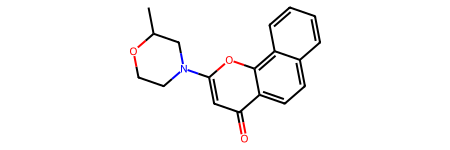

In [46]:
###########################
# Adding more Descriptors #
###########################

# Convert smiles to molecules

calc = Calculator(descriptors, ignore_3D=True)
mols = [Chem.MolFromSmiles(smi) for smi in df.canonical_smiles.tolist()]

# Calculate Descriptors for enzymes

X = calc.pandas(mols)

dataset = pd.concat([X, df], axis=1)

# Print to see molecule

mols[0]

In [58]:
dataset.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,mZagreb1,mZagreb2,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,29.353196,2.492309,4.984618,29.353196,1.334236,4.051752,...,5.888889,4.722222,CHEMBL435507,intermediate,CC1CN(c2cc(=O)c3ccc4ccccc4c3o2)CCO1,295.338,3.1713,0.0,4.0,5.318759
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,31.286902,2.475839,4.951677,31.286902,1.360300,4.087038,...,5.527778,5.055556,CHEMBL98350,intermediate,O=c1cc(N2CCOCC2)oc2c(-c3ccccc3)cccc12,307.349,3.2966,0.0,4.0,5.602060
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,28.634897,2.490392,4.980783,28.634897,1.363567,4.007424,...,5.027778,4.555556,CHEMBL104468,intermediate,O=c1cc(N2CCOCC2)oc2c1ccc1ccccc12,281.311,2.7828,0.0,4.0,5.193820
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,28.634897,2.490392,4.980783,28.634897,1.363567,4.007424,...,5.027778,4.555556,CHEMBL179242,intermediate,O=c1cc(N2CCOCC2)nc2c3ccccc3ccn12,281.315,1.6843,0.0,5.0,5.275724
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,41.259784,2.545973,5.039642,41.259784,1.375326,4.376428,...,6.722222,6.416667,CHEMBL188678,intermediate,O=c1cc(N2CCOCC2)oc2c(-c3cccc4c3sc3ccccc34)cccc12,413.498,5.6645,0.0,5.0,5.769551


In [ ]:
dataset.to_csv('mTOR_descriptors.csv', index=False)